Source: https://www.youtube.com/watch?v=vB8SleIKlcw [17.12.2021]

Source: https://www.youtube.com/watch?v=WvoLTXIjBYU [17.12.2021]

Source: https://www.youtube.com/watch?v=wQ8BIBpya2k&t [18.12.2021]

Source https://www.youtube.com/watch?v=uqomO_BZ44g&t=8s [19.12.2021]

Source: https://thispointer.com/python-get-list-of-files-in-directory-sorted-by-name/ [20.12.2021]

Source: https://www.youtube.com/watch?v=j-3vuBynnOE&t=889s [20.12.2021]

Source: https://wiki.python.org/moin/UsingPickle [21.12.2021]

Source: https://stackoverflow.com/questions/39283358/keras-how-to-record-validation-loss/39291417 [01.01.2022]

Source: https://stackoverflow.com/questions/64666917/optuna-memory-issues [01.01.2022]

In [ ]:
!pip install optuna

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras.backend as K
import optuna
from keras.callbacks import ModelCheckpoint
import keras

Set the height and width of the training pictures

In [ ]:
width = 30
height = 17


Load the training data

In [ ]:
training_data = pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs01_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs02_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs03_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs04_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))

training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs06_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs07_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs08_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs09_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))

training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs10_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
training_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs11_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))

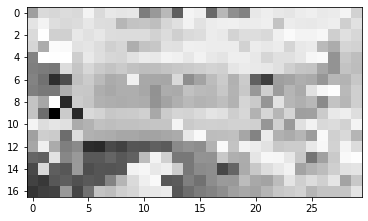

In [ ]:
plt.imshow(training_data[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
print(len(training_data))

711337


Normalize the the pictures 

In [ ]:
training_data = np.divide(training_data, 255.0)

In [ ]:
X_all = []
y_all = []

This method creats the training set with the given look back

In [ ]:
def create_dataset(dataset, lb):
  X_all = []
  y_all = []

  look_back = lb

  for i in range(look_back, len(dataset)):
    x = []
    for j in range(i-look_back, i):
      x.extend(dataset[j])
    X_all.append(x)
    y_all.append(dataset[i])

  X_all, y_all = np.array(X_all), np.array(y_all)
  y_all = np.reshape(y_all, (len(y_all), width*height), 'C')
  X_all = np.reshape(X_all, (len(X_all), width*height*look_back), 'C')
  return X_all, y_all

This method sets up the optuna trial

In [ ]:
def objective(trial):
  K.clear_session()

  X_all = []
  y_all = []
  
  hidden_activation = trial.suggest_categorical('activation_hidden_layer', ['relu', 'sigmoid'])
  out_activation = trial.suggest_categorical('activation_layer_out', ['linear', 'sigmoid'])
  optimizer = trial.suggest_categorical('optimizer', ['adam', 'RMSprop'])
  batch_size = trial.suggest_int('batch_size', 32, 512)
  lb = trial.suggest_int('look_back', 3, 7)
  layer_number = trial.suggest_int('layer_number', 5, 7)

  X_all, y_all = create_dataset(training_data, lb)

  model = Sequential()
  
  model.add(Dense(
      units = trial.suggest_int('units_layer_1', 1, 3000)
  ))
  model.add(Dense(
      units = trial.suggest_int('units_layer_2', 1, 3000),
      activation = hidden_activation
  ))
  model.add(Dense(
      units = trial.suggest_int('units_layer_3', 1, 3000),
      activation = hidden_activation
  ))
  model.add(Dense(
      units = trial.suggest_int('units_layer_4', 1, 3000),
      activation = hidden_activation
  ))
  if(layer_number >= 6):
    model.add(Dense(
      units = trial.suggest_int('units_layer_5', 1, 3000),
      activation = hidden_activation
    ))
  if(layer_number == 7):
    model.add(Dense(
      units = trial.suggest_int('units_layer_6', 1, 3000),
      activation = hidden_activation
  ))
  model.add(Dense(
      units = width*height, 
      activation = out_activation
  ))
  model.compile(
      loss = 'mean_squared_error', 
      optimizer = optimizer)
  train_history = model.fit(X_all, y_all, validation_split=0.2, 
                            epochs = 200, 
                            batch_size = batch_size,
                            verbose=0)
  val_loss = train_history.history['val_loss'][0]
  
  return val_loss

In [ ]:
study =  optuna.create_study(direction='minimize')
study.optimize(objective, timeout=82800, gc_after_trial=True)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-01-10 13:36:55,835] A new study created in memory with name: no-name-07136e63-88d8-4588-acf9-2291acf4816d
[I 2022-01-10 14:57:09,966] Trial 0 finished with value: 0.04317769780755043 and parameters: {'activation_hidden_layer': 'relu', 'activation_layer_out': 'linear', 'optimizer': 'RMSprop', 'batch_size': 477, 'look_back': 4, 'layer_number': 7, 'units_layer_1': 2580, 'units_layer_2': 2891, 'units_layer_3': 1738, 'units_layer_4': 2957, 'units_layer_5': 507, 'units_layer_6': 2989}. Best is trial 0 with value: 0.04317769780755043.
[I 2022-01-10 15:23:31,952] Trial 1 finished with value: 0.010339140892028809 and parameters: {'activation_hidden_layer': 'relu', 'activation_layer_out': 'sigmoid', 'optimizer': 'adam', 'batch_size': 497, 'look_back': 5, 'layer_number': 5, 'units_layer_1': 719, 'units_layer_2': 1001, 'units_layer_3': 2939, 'units_layer_4': 153}. Best is trial 1 with value: 0.010339140892028809.
[I 2022-01-10 16:11:02,066] Trial 2 finished with value: 0.007016874849796295

Best model:

Value: 0.007016874849796295.

Params: 
- activation_hidden_layer: relu
- activation_layer_out: sigmoid
- optimizer: adam
- batch_size: 107
- look_back: 5
- layer_number: 5
- units_layer_1: 498
- units_layer_2: 687
- units_layer_3: 376
- units_layer_4: 1125

Create the training dataset with look back 5

In [ ]:
X_all, y_all = create_dataset(training_data, 5)

Train the suggestet model from optuna

In [ ]:
model = Sequential()
model.add(Dense(498))
model.add(Dense(687, activation='relu'))
model.add(Dense(376, activation='relu'))
model.add(Dense(1125, activation='relu'))
model.add(Dense(width*height, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

filepath = 'drive/MyDrive/pictureNN_30x17_shuffled/weights-improvement-{epoch:d}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(X_all, y_all, validation_split=0.2, epochs=3500, batch_size=107, callbacks=callbacks_list, verbose=2)

model.save('drive/MyDrive/pictureNN_30x17/3500.hdf5')

Load the model with the best validation loss

In [ ]:
best_val_model = Sequential()
best_val_model.add(Dense(498))
best_val_model.add(Dense(687, activation='relu'))
best_val_model.add(Dense(376, activation='relu'))
best_val_model.add(Dense(1125, activation='relu'))
best_val_model.add(Dense(width*height, activation='sigmoid'))

best_val_model = keras.models.load_model('drive/MyDrive/pictureNN_30x17/weights-improvement-11.hdf5')

Calculate the duration of a prediction

In [ ]:
import time
start_time = time.time()
predict = best_val_model.predict(X_all)
duration = time.time() - start_time
print("--- %s seconds ---" % (duration))
print(duration/len(X_all))

--- 30.450735807418823 seconds ---

4.28080499786581e-05

Calculate the training error

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(y_all[:], predict[:]))
print('Score: %.4f RMSE' % (trainScore))

Score: 0.0743 RMSE


Score: 0.0743 RMSE

Load the test set

In [ ]:
test_data = pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs12_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))
test_data += pickle.load(open('drive/MyDrive/Bachelorarbeit/Datensatz/Bilder/Bilder 30x17/cs13_' + str(width) + 'x' + str(height) + '.pkl', 'rb'))

In [ ]:
len(test_data)

134159

In [ ]:
test_data = np.divide(test_data, 255.0)

In [ ]:
X_all, y_all = create_dataset(test_data, 5)

Take a look at the predictions

In [ ]:
testPredict = best_val_model.predict(X_all)

In [ ]:
pic_number = 130000

In [ ]:
test_picture = y_all[pic_number]
test_picture = np.reshape(test_picture, (height, width))

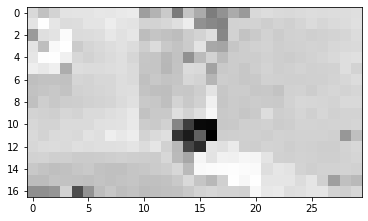

In [ ]:
plt.imshow(test_picture, cmap = plt.cm.binary)
plt.show()

In [ ]:
predicted_picture = testPredict[pic_number]
predicted_picture = np.reshape(predicted_picture, (height, width))

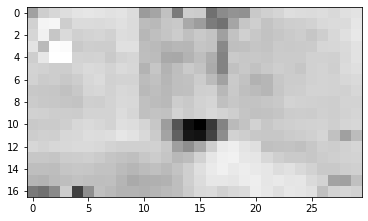

In [ ]:
plt.imshow(predicted_picture, cmap = plt.cm.binary)
plt.show()

Save the example pictures

In [ ]:
from PIL import Image
test_picture = np.multiply(test_picture, 255.0)
im = Image.fromarray(test_picture)
im = im.convert('L')
im.save('drive/MyDrive/bilder_ba/test_pic_30x17_5.png')
predicted_picture = np.multiply(predicted_picture, 255.0)
im = Image.fromarray(predicted_picture)
im = im.convert('L')
im.save('drive/MyDrive/bilder_ba/pre_pic_30x17_5.png')

Calculate the test error

In [ ]:
testScore = math.sqrt(mean_squared_error(y_all[:], testPredict[:]))
print('Score: %.4f RMSE' % (testScore))

Score: 0.0784 RMSE


Score: 0.0784 RMSE